# Projeto: Classificação de Roupas

# Etapa 01: Importação das Bibliotecas

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
tf.__version__

'2.16.1'

# Etapa 02: Carregamento de dados

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#fashion_train_df = pd.read_csv('/content/drive/MyDrive/ML/fashion-mnist_train.csv', sep=',')
#fashion_test_df = pd.read_csv('/content/drive/MyDrive/ML/fashion-mnist_test.csv', sep=',')

fashion_train_df = pd.read_csv('archive/fashion-mnist_train.csv', sep=',')
fashion_test_df = pd.read_csv('archive/fashion-mnist_test.csv', sep=',')

# Etapa 03: Visualização dos dados

In [4]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_train_df.shape

(60000, 785)

In [7]:
fashion_test_df.shape

(10000, 785)

In [8]:
training = np.array(fashion_train_df, dtype='float32')
testing = np.array(fashion_test_df, dtype='float32')

label:  1.0


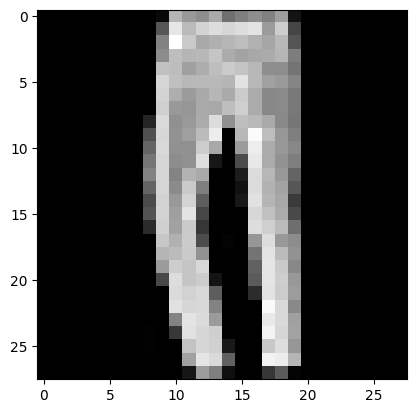

In [9]:
#pegar um item aleatoriamente
i = random.randint(1,60000)
plt.imshow(training[i,1:].reshape((28,28)),cmap='gray')
print('label: ', training[i,0])

0=> Camiseta/top
1=> Calça
2=> Sueter
3=> Vestido
4=> Casaco
5=> Sandália
6=> Camisa
7=> Tenis
8=> Bolsa
9=> Bota

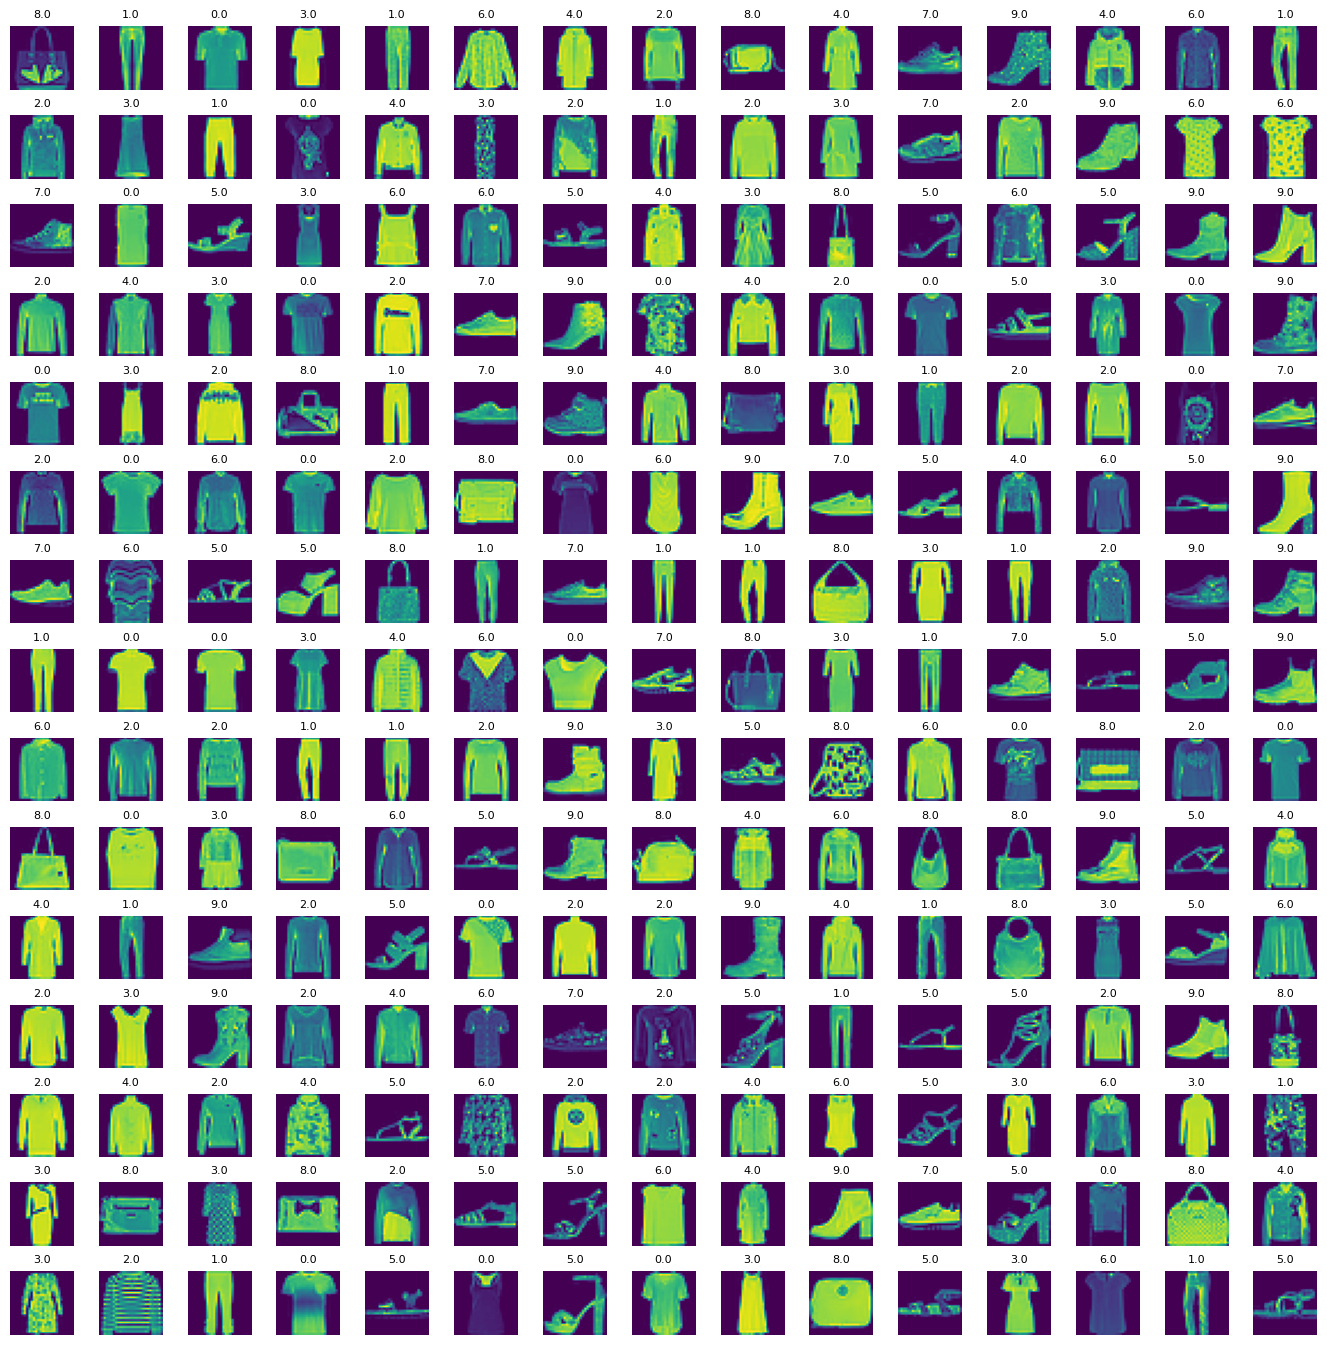

In [10]:
# vamos visualizar algumas imagens
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid,W_grid, figsize = (17,17))
axes = axes.ravel()
n_training = len(training)

for i in np.arange(0, W_grid * L_grid):
   index = np.random.randint(0,n_training)
   axes[i].imshow(training[index,1:].reshape((28,28)))
   axes[i].set_title(training[index,0], fontsize=8)
   axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Etapa 04: Tratamento de dados

In [11]:
#pixel-value is an integer between 0 and 255.
X_train = training[:,1:] / 255 # remove o label e padroniza os valores entre 0 e 1
y_train = training[:,0]

In [12]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
X_test = testing[:,1:] / 255
y_test = testing[:,0]

In [14]:
X_train.shape

(60000, 784)

In [15]:
X_train[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
# Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. 
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))

In [17]:
X_test.shape

(10000, 28, 28, 1)

In [18]:
X_train.shape

(60000, 28, 28, 1)

# Etapa 05: Construção e Treinamento do modelo

In [19]:
from tensorflow.keras import layers, models
cnn = models.Sequential()
## Adicionado uma camada de convolucinal 
cnn.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
## Adicionado uma camada polling
cnn.add(layers.MaxPooling2D(2,2))
## Adicionado uma camada de convolucinal 
cnn.add(layers.Conv2D(64, (3,3), activation='relu'))
## Adicionado uma camada polling
cnn.add(layers.MaxPooling2D(2,2))
## Adicionado uma camada de convolucinal 
cnn.add(layers.Conv2D(64, (3,3), activation='relu'))
## Adicionado uma camada de flattening
cnn.add(layers.Flatten())
## Adicionado uma camada densa de aprendizagem
cnn.add(layers.Dense(1024, activation='relu'))
## Última camada de saída 
cnn.add(layers.Dense(10, activation='softmax'))
cnn.summary()
## https://developers.google.com/machine-learning/crash-course/multi-class-neural-networks/softmax

c:\tools\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       590,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 656,842 (2.51 MB)

 Trainable params: 656,842 (2.51 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
cnn.compile(loss= 'sparse_categorical_crossentropy', optimizer='Adam', metrics= ['accuracy'])

In [21]:
epochs_hist = cnn.fit(X_train, y_train, batch_size=250, epochs=200)
# Maquina padrao 6 minutos com GPU / 30 minutos local

Epoch 1/200
240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.6671 - loss: 0.9342
Epoch 2/200
240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.8568 - loss: 0.3981
Epoch 3/200
240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.8827 - loss: 0.3228
Epoch 4/200
240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.8972 - loss: 0.2859
Epoch 5/200
240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9058 - loss: 0.2560
Epoch 6/200
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9140 - loss: 0.2377
Epoch 7/200
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9165 - loss: 0.2293
Epoch 8/200
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9257 - loss: 0.1999
Epoch 9/200
240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9305 - loss: 0.1866
Epoch 10/200
240/240 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9360 - loss: 0.1724
Epoch 11/200
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9430 - loss: 0.1558
Epoch 12/200
240/240 ━━━━━━━━━

# Etapa 06: Avaliação do modelo

In [ ]:
evaluation = cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9147 - loss: 0.6504


In [ ]:
prediction = cnn.predict(X_test)
prediction_classes = np.argmax(prediction,axis=1)
prediction_classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

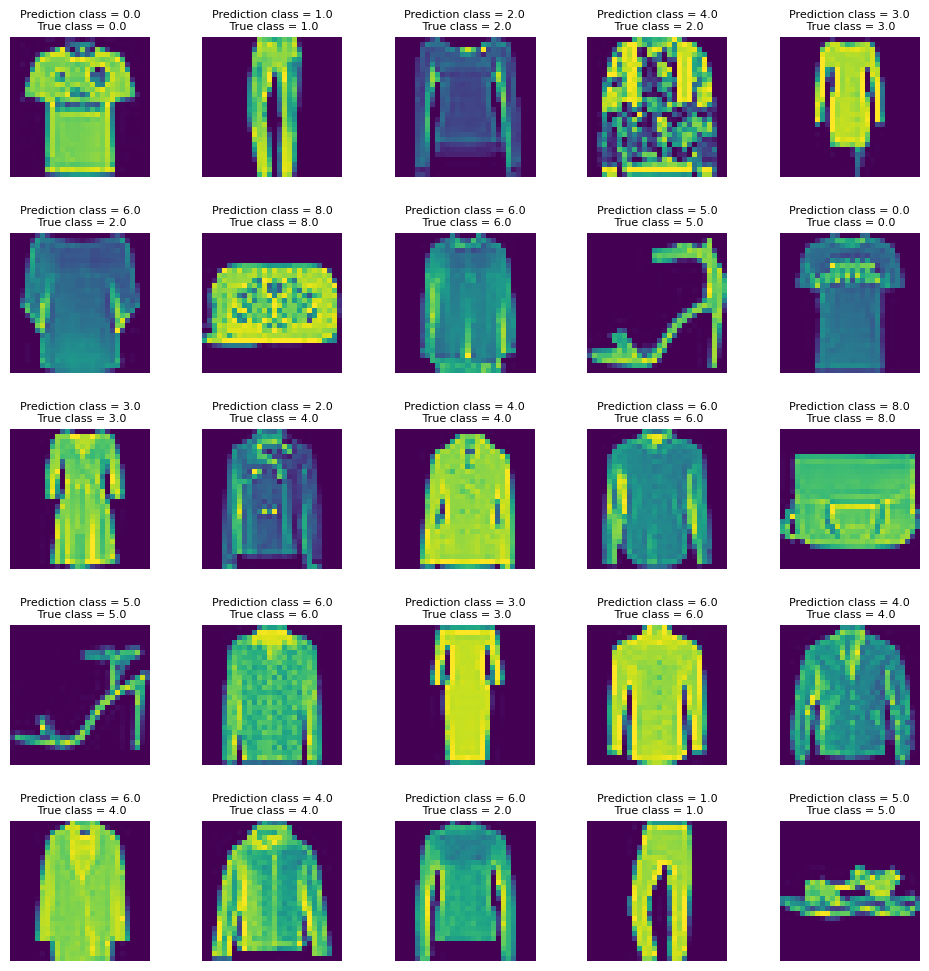

In [ ]:
W_grid = 5
L_grid = 5

fig, axes = plt.subplots(L_grid,W_grid, figsize = (12,12))
axes = axes.ravel()
n_training = len(training)

for i in np.arange(0, W_grid * L_grid):
   axes[i].imshow(X_test[i].reshape((28,28)))
   axes[i].set_title("Prediction class = {:0.1f}\n True class = {:0.1f}"
    .format(prediction_classes[i], y_test[i]), fontsize = 8)
   axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

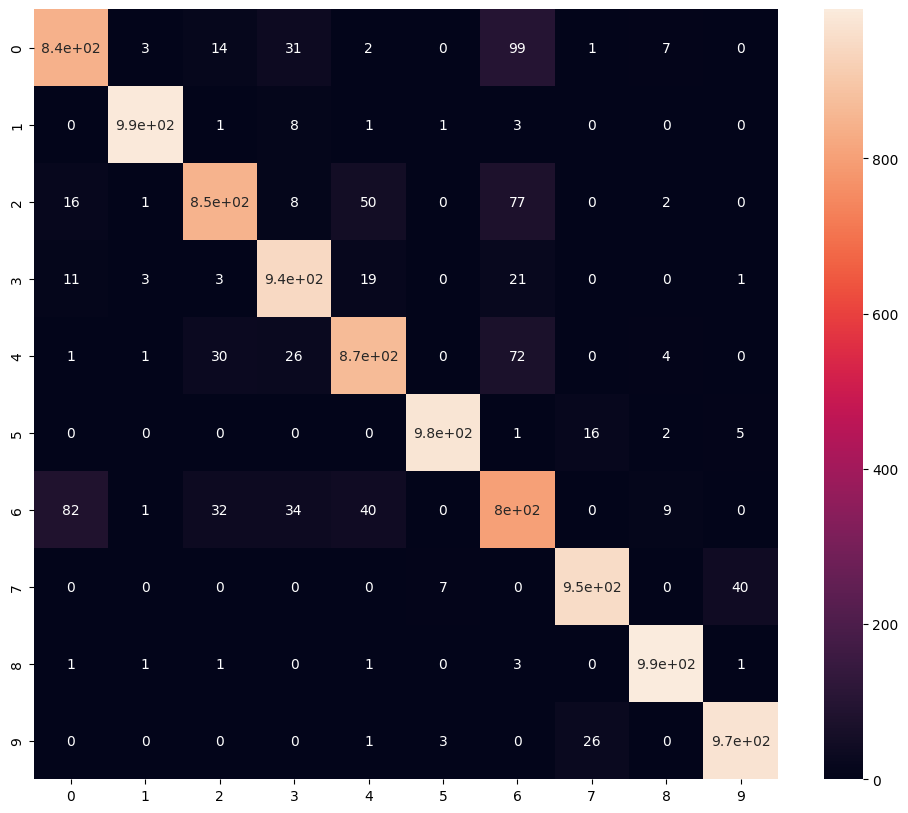

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction_classes)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import classification_report
num_class = 10
target_names = ["Class {}".format(i) for i in range(num_class)]
target_names
print(classification_report(y_test, prediction_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.88      0.84      0.86      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.91      0.85      0.88      1000
     Class 3       0.90      0.94      0.92      1000
     Class 4       0.88      0.87      0.87      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.74      0.80      0.77      1000
     Class 7       0.96      0.95      0.95      1000
     Class 8       0.98      0.99      0.98      1000
     Class 9       0.95      0.97      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

